# üìò An√°lisis Multivariado y Storytelling de Recursos Humanos

üîπ Introducci√≥n

Este dataset contiene datos de empleados de una empresa. El objetivo es explorar c√≥mo diferentes caracter√≠sticas se relacionan con la deserci√≥n laboral (Attrition) y construir un modelo anal√≠tico, visual e interpretativo que pueda servir para presentar hallazgos a un equipo de RRHH o direcci√≥n.

üìä Columnas relevantes incluyen:

- Age, Gender, MaritalStatus

- Attrition: Variable objetivo (S√≠/No)

- JobSatisfaction, WorkLifeBalance, MonthlyIncome

- DistanceFromHome, BusinessTravel, YearsAtCompany

- TotalWorkingYears, NumCompaniesWorked, etc.

### üìÇ Parte 1 ‚Äì An√°lisis Exploratorio y Preparaci√≥n

In [85]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import chi2_contingency
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
import umap

df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

# Limpieza b√°sica
df.drop(columns=["EmployeeCount", "Over18", "StandardHours", "EmployeeNumber"], inplace=True)

# Codificar columnas categ√≥ricas para an√°lisis multivariado
# Esta clase convierte etiquetas categ√≥ricas en n√∫meros

df_encoded = df.copy()
for col in df_encoded.select_dtypes(include="object"):
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

df_encoded.head()


Age  Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0   41          1               2       1102           2                 1   
1   49          0               1        279           1                 8   
2   37          1               2       1373           1                 2   
3   33          0               1       1392           1                 3   
4   27          0               2        591           1                 2   

   Education  EducationField  EnvironmentSatisfaction  Gender  ...  \
0          2               1                        2       0  ...   
1          1               1                        3       1  ...   
2          2               4                        4       1  ...   
3          4               1                        4       0  ...   
4          1               3                        1       1  ...   

   PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0                  3                         1                 0   
1                  4                         4                 1   
2                  3                         2                 0   
3                  3                         3                 0   
4                  3                         4                 1   

   TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
0                  8                      0                1               6   
1                 10                      3                3              10   
2                  7                      3                3               0   
3                  8                      3                3               8   
4                  6                      3                3               2   

   YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                   4                        0                     5  
1                   7                        1                     7  
2                   0                        0                     0  
3                   7                        3                     0  
4                   2                        2                     2  

[5 rows x 31 columns]

### üìà Parte 2 ‚Äì An√°lisis Multivariado

1. Heatmap de Correlaci√≥n

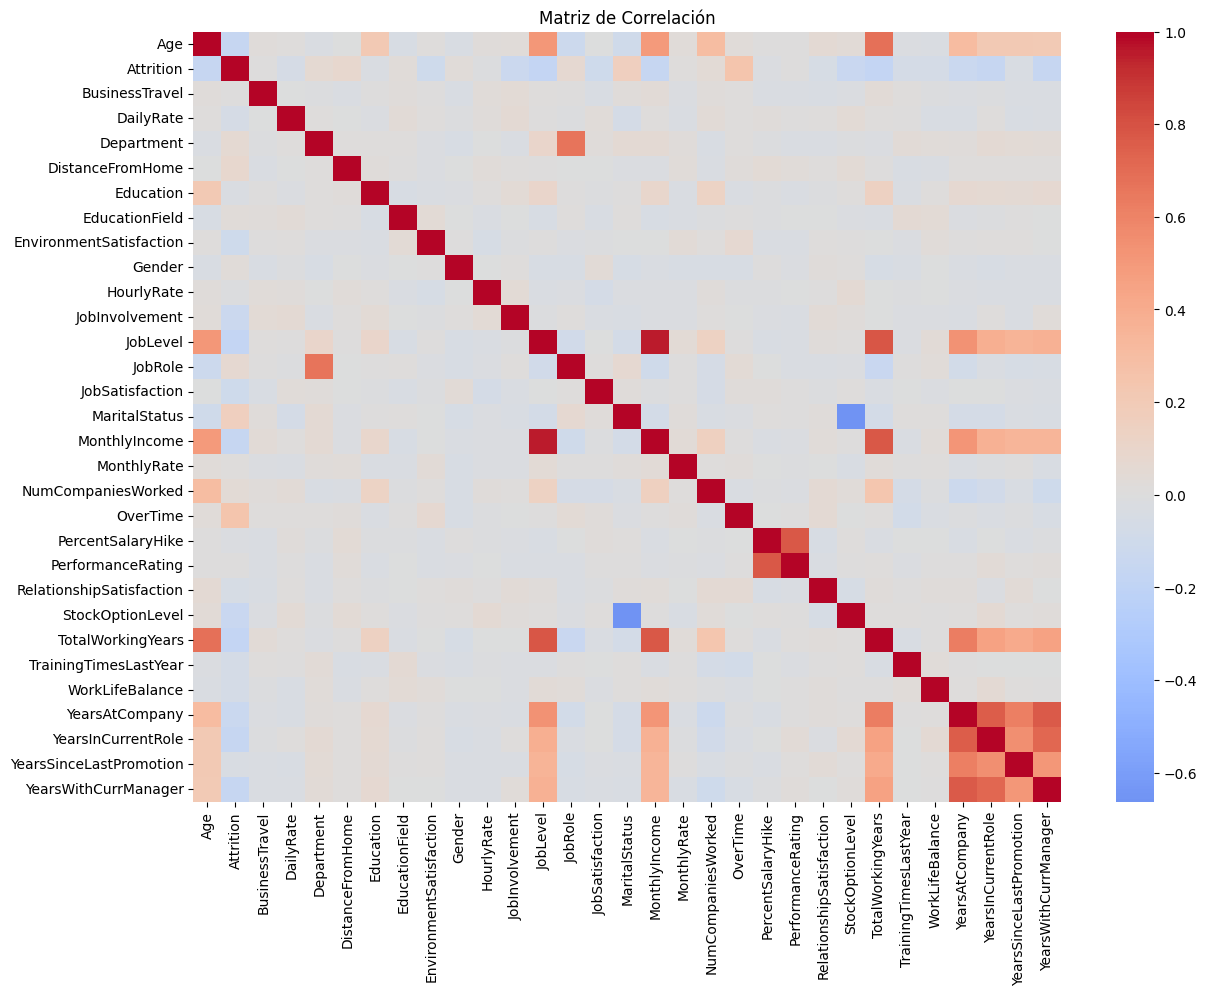

In [86]:
plt.figure(figsize=(14,10))
sns.heatmap(df_encoded.corr(), annot=False, cmap='coolwarm', center=0)
plt.title("Matriz de Correlaci√≥n")
plt.show()


##### üìå Actividad 1: ¬øQu√© variables parecen estar m√°s correlacionadas con Attrition? ¬øY entre s√≠?

Variables m√°s correlacionadas con Attrition:
* OverTime: tiene una correlaci√≥n positiva notable con Attrition (0.25‚Äì0.3). Esto sugiere que las personas que trabajan horas extra tienden a tener una mayor probabilidad de dejar la empresa.
* JobLevel: muestra una correlaci√≥n negativa d√©bil con Attrition (-0.2), indicando que los empleados de mayor nivel tienden a quedarse m√°s.
* MonthlyIncome: correlaci√≥n negativa tambi√©n (similar a JobLevel), es decir, a mayor ingreso, menor probabilidad de desvinculaci√≥n.
* TotalWorkingYears y YearsAtCompany: correlaciones negativas leves, lo que implica que personas con m√°s antig√ºedad tienden a quedarse.

Variables que est√°n m√°s correlacionadas entre s√≠:
* MonthlyIncome y JobLevel: alta correlaci√≥n positiva (0.95), lo cual es l√≥gico ya que empleados en niveles superiores suelen tener mayores ingresos.
* TotalWorkingYears y Age: fuerte correlaci√≥n positiva (0.7‚Äì0.8), esperado ya que personas mayores han trabajado m√°s a√±os.
* YearsAtCompany, YearsInCurrentRole, YearsWithCurrManager: todas estas variables est√°n correlacionadas positivamente entre s√≠, indicando que la permanencia en la empresa tiende a reflejarse en roles estables.

2. An√°lisis de Componentes Principales (PCA)

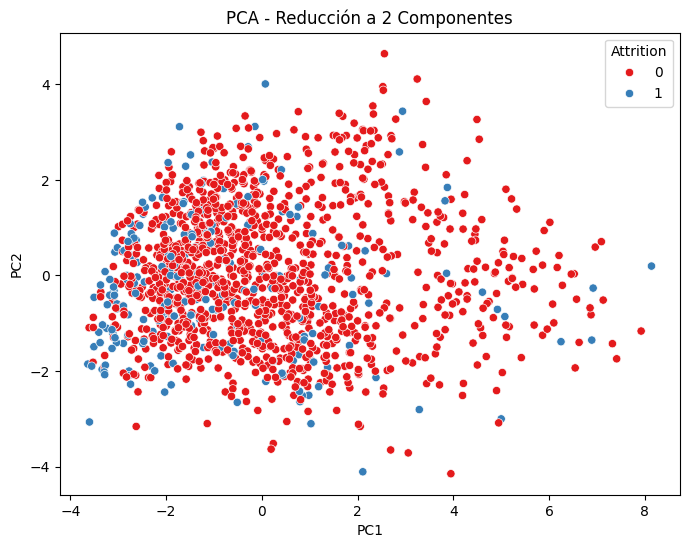

In [87]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = df_encoded.drop("Attrition", axis=1)
y = df_encoded["Attrition"]

# Escala todas las variables de X para que tengan media 0 y desviaci√≥n est√°ndar 1.
# Esto es crucial para PCA, ya que se basa en la varianza de las variables.
X_scaled = StandardScaler().fit_transform(X)

# PCA: t√©cnica para reducir la cantidad de variables manteniendo la mayor varianza posible.
# Se crea un modelo PCA que reduce a 2 componentes principales.

pca = PCA(n_components=2)

# encuentra esas componentes y transforma los datos originales X_scaled a un nuevo espacio
# de solo 2 dimensiones, almacenado en X_pca.
# Al reducir a 2D, pod√©s graficar los datos y observar patrones visuales
# Reducir ruido y mejorar rendimiento en algunos modelos

X_pca = pca.fit_transform(X_scaled)

# Visualizaci√≥n
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y, palette='Set1')
plt.title("PCA - Reducci√≥n a 2 Componentes")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


##### üìå Actividad 2: ¬øQu√© tanto se separan las clases de Attrition en el espacio reducido? ¬øQu√© significa esto?

* Superposici√≥n entre clases:
  * Hay una alta superposici√≥n entre los puntos rojos y azules. Esto indica que no hay una clara separaci√≥n entre quienes abandonaron y quienes no, al menos en las dos primeras componentes principales.
  * Visualmente, no se forman cl√∫steres bien diferenciados por clase de Attrition.
* Distribuci√≥n general:
  * La mayor√≠a de los puntos est√°n agrupados cerca del centro (alrededor de PC1 = 0, PC2 = 0), lo que es com√∫n despu√©s de aplicar StandardScaler() y PCA.
  * Hay algunos valores at√≠picos (outliers) hacia la derecha en PC1, pero no parecen ser exclusivos de una clase.
* Implicancias para modelado:
  * Esta visualizaci√≥n sugiere que el PCA no logra separar bien las clases en 2 dimensiones.
  * Es probable que la informaci√≥n que distingue Attrition est√© dispersa en componentes m√°s all√° de las primeras 2, o que no sea linealmente separable, lo cual es una limitaci√≥n del PCA.



### üìä Parte 3 ‚Äì Visualizaciones Avanzadas

3. Violinplot + Boxplot

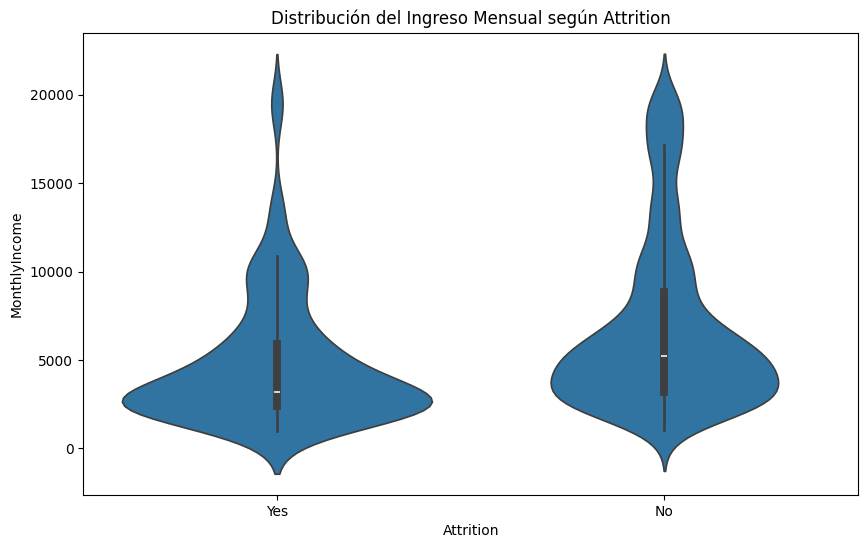

In [88]:
plt.figure(figsize=(10,6))
sns.violinplot(x="Attrition", y="MonthlyIncome", data=df)
plt.title("Distribuci√≥n del Ingreso Mensual seg√∫n Attrition")
plt.show()


##### üìå Actividad 3: ¬øQu√© conclusiones podr√≠as sacar sobre ingresos y deserci√≥n?

* Distribuciones diferentes:
  * Los empleados que no abandonaron la empresa ("No") tienden a tener mayores ingresos mensuales que los que s√≠ lo hicieron ("Yes").
  * La distribuci√≥n para los que permanecen en la empresa se extiende m√°s hacia los ingresos altos, con una mayor densidad en valores medios-altos.
* Mediana m√°s baja en quienes se fueron:
  * La caja (boxplot interno del viol√≠n) muestra que la mediana de ingresos es menor en el grupo que se fue.
* Mayor concentraci√≥n de sueldos bajos en los que se fueron:
  * Hay una mayor densidad en ingresos bajos entre los empleados que abandonaron, lo que sugiere que los salarios m√°s bajos est√°n asociados a mayor deserci√≥n.
* Variedad de ingresos en los que no se fueron:
  * El grupo que no abandon√≥ la empresa muestra una distribuci√≥n m√°s ancha, lo cual indica que hay empleados con una amplia gama de salarios que permanecen.

4. Lineplots & FacetGrid

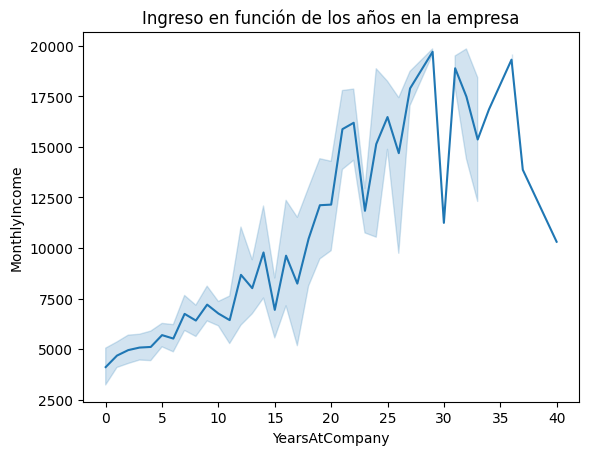

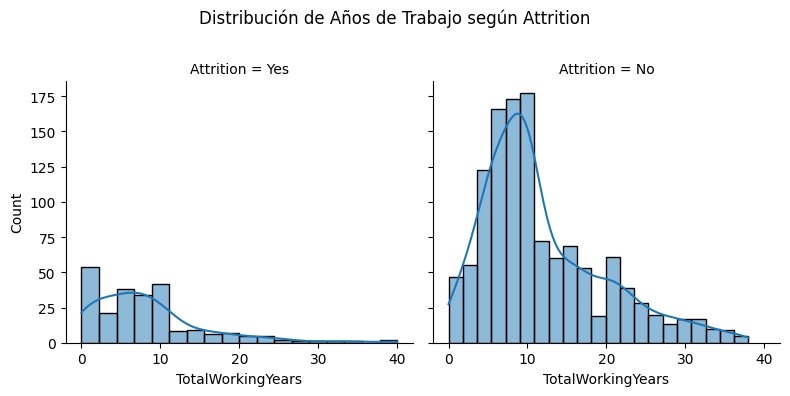

In [89]:
sns.lineplot(x="YearsAtCompany", y="MonthlyIncome", data=df)
plt.title("Ingreso en funci√≥n de los a√±os en la empresa")
plt.show()

# Multigr√°fico
g = sns.FacetGrid(df, col="Attrition", height=4)
g.map_dataframe(sns.histplot, x="TotalWorkingYears", kde=True)
g.fig.subplots_adjust(top=0.8)
g.fig.suptitle("Distribuci√≥n de A√±os de Trabajo seg√∫n Attrition")
plt.show()


##### üìå Actividad 4: ¬øQu√© diferencias observ√°s entre empleados que renunciaron y los que no?

* Empleados que renunciaron (Attrition = Yes):
  * Tienen en su mayor√≠a pocos a√±os de experiencia total (generalmente menos de 10 a√±os).
  * La distribuci√≥n est√° concentrada en los primeros a√±os, con una ca√≠da r√°pida despu√©s.
  * Esto sugiere que los empleados m√°s nuevos o con menos experiencia tienden a renunciar m√°s.
* Empleados que NO renunciaron (Attrition = No):
  * Tienen una distribuci√≥n m√°s amplia de a√±os de experiencia, con un pico entre los 5 y 15 a√±os.
  * Hay m√°s empleados con experiencia prolongada (hasta 40 a√±os).
  * Esto indica que los empleados con m√°s trayectoria tienden a permanecer en la empresa.

5. Pairplot

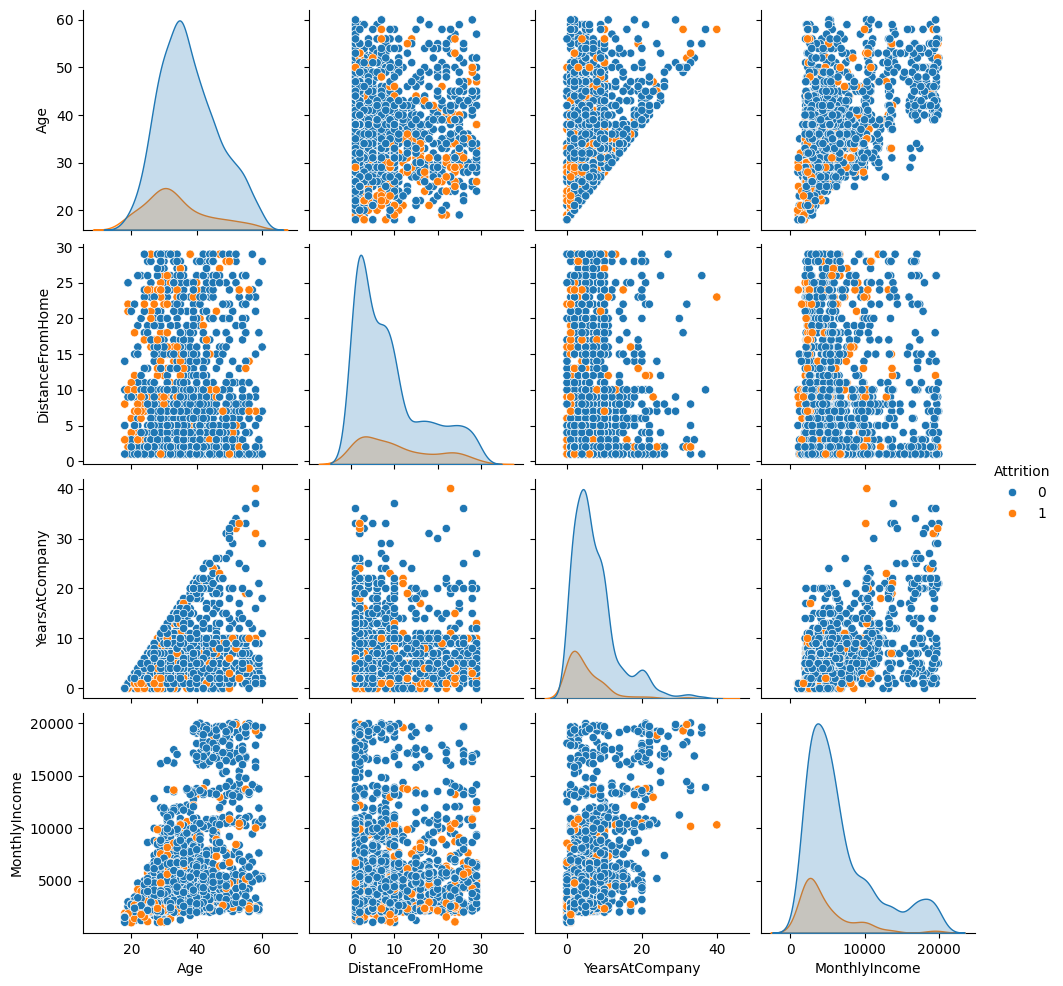

In [90]:
sns.pairplot(df_encoded[['Age', 'DistanceFromHome', 'YearsAtCompany', 'MonthlyIncome', 'Attrition']], hue="Attrition")
plt.show()


##### üìå Actividad 5: ¬øQu√© relaciones ocultas pod√©s observar?

* Edad (Age) y Deserci√≥n
  * La mayor√≠a de los empleados que renunciaron est√°n en el rango de 20 a 35 a√±os.
  * A medida que aumenta la edad, la deserci√≥n parece disminuir.
  * Esto sugiere que los empleados m√°s j√≥venes tienen mayor probabilidad de renunciar.

* Ingreso mensual (MonthlyIncome)
  * Los empleados con ingresos m√°s bajos tienden a renunciar con m√°s frecuencia.
  * Casi no hay deserci√≥n entre empleados que ganan m√°s de 15,000.  

* A√±os en la empresa (YearsAtCompany)
  * Muchos de los que renunciaron tienen menos de 5 a√±os en la empresa.  
  * Se observa una mayor permanencia (menos renuncias) a medida que los empleados acumulan m√°s a√±os en la empresa.

*  Distancia desde casa (DistanceFromHome)  
  * No se observa una relaci√≥n clara, pero hay ligera concentraci√≥n de       deserciones en distancias m√°s bajas, lo cual puede ser sorpresivo. Se esperar√≠a lo contrario.
  * Posiblemente esta variable no tenga un gran peso por s√≠ sola, o est√© influenciada por otras variables como salario o edad.

* Correlaciones entre variables
  * Age vs MonthlyIncome muestra una correlaci√≥n positiva esperada: empleados mayores tienden a ganar m√°s.  
  * YearsAtCompany tambi√©n se relaciona en parte con MonthlyIncome y Age, pero hay bastante dispersi√≥n.

### üß™ Parte 4 ‚Äì Inferencia: Pruebas de Hip√≥tesis y Intervalos

6. Prueba de Hip√≥tesis: ¬øGanan m√°s los que se quedan?

In [91]:
from scipy.stats import ttest_ind

stay = df[df['Attrition'] == 'No']['MonthlyIncome']
leave = df[df['Attrition'] == 'Yes']['MonthlyIncome']

t_stat, p_value = ttest_ind(stay, leave, equal_var=False)
print(f"T-Stat: {t_stat:.2f}, p-Valor: {p_value:.4f}")


T-Stat: 7.48, p-Valor: 0.0000


##### üìå Actividad 6: ¬øSe puede rechazar la hip√≥tesis nula de que ganan igual?

* Hip√≥tesis nula (H‚ÇÄ): No hay diferencia en los ingresos mensuales entre los empleados que se quedan y los que renuncian (equal_var=False).
* Hip√≥tesis alternativa (H‚ÇÅ): Hay una diferencia en los ingresos mensuales entre ambos grupos.
* T-Stat = 7.48: indica que hay una diferencia notable entre los promedios.
* p-Valor = 0.0000: est√° muy por debajo de cualquier umbral t√≠pico de significancia (por ejemplo, 0.05).
* Como el p-valor es casi 0, rechazamos la hip√≥tesis nula.

7. Intervalo de Confianza para Satisfacci√≥n Laboral

In [92]:
from scipy import stats

mean_js = df[df["Attrition"] == "Yes"]["JobSatisfaction"].mean()
sem_js = stats.sem(df[df["Attrition"] == "Yes"]["JobSatisfaction"])
ci = stats.t.interval(0.95, len(stay)-1, loc=mean_js, scale=sem_js)

print(f"IC 95% para JobSatisfaction (Attrition = Yes): {ci}")


IC 95% para JobSatisfaction (Attrition = Yes): (np.float64(2.3258707540289096), np.float64(2.6108381067305837))


Esto indica que, con un 95% de confianza, la media de satisfacci√≥n laboral de quienes renunciaron est√° entre 2.32 y 2.61

### üß† Parte 5 ‚Äì Actividades Finales de Storytelling

#### üéØ Proyecto Final

#### üìå Objetivo: Presentar una historia clara y visualmente atractiva sobre las causas m√°s relevantes de deserci√≥n laboral en esta empresa. Usar visualizaciones, texto y an√°lisis para:

Consignas:

- Construir al menos 3 visualizaciones distintas, incluyendo una multivariada.

- Incluir al menos una prueba de hip√≥tesis o intervalo de confianza.

- Identificar patrones relevantes con t√©cnicas de reducci√≥n de dimensionalidad.

- Escribir una narrativa clara que responda:

  - ¬øPor qu√© los empleados renuncian?

  - ¬øQu√© grupo est√° en mayor riesgo?

  - ¬øQu√© puede hacer la empresa?

üìä Pueden utilizar Seaborn, Plotly, Pandas o cualquier herramienta para la presentaci√≥n visual. Se evaluar√° la claridad del an√°lisis, la creatividad visual y la solidez de la interpretaci√≥n.

### **An√°lisis de Datos: Causas de Deserci√≥n Laboral**

Este notebook tiene como objetivo analizar las principales causas de deserci√≥n de personal en la empresa, utilizando datos hist√≥ricos y t√©cnicas de procesamiento estad√≠stico. A trav√©s de un enfoque basado en datos, se buscar√° identificar patrones, correlaciones y variables cr√≠ticas que influyen en la deserci√≥n, con el fin de generar insights accionables.

#### *Metodolog√≠a:*

An√°lisis descriptivo y visualizaci√≥n (Matplotlib/Seaborn).

Interpretaci√≥n de resultados y recomendaciones estrat√©gicas.

#### Gr√°fico mostrando la deserci√≥n global

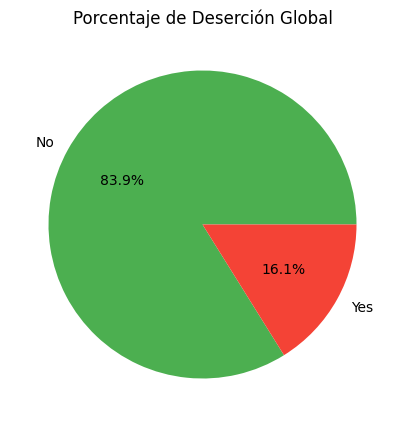

Tasa global de deserci√≥n: 16.12%


In [93]:
# Porcentaje total de deserci√≥n
attrition_rate = df_encoded['Attrition'].value_counts(normalize=True)[1] * 100
plt.figure(figsize=(5, 5))
plt.pie(df['Attrition'].value_counts(), labels=['No', 'Yes'], autopct='%1.1f%%', colors=['#4CAF50', '#F44336'])
plt.title('Porcentaje de Deserci√≥n Global')
plt.show()

print(f"Tasa global de deserci√≥n: {attrition_rate:.2f}%")

#### Gr√°fico mostrando deserci√≥n por edad y g√©nero

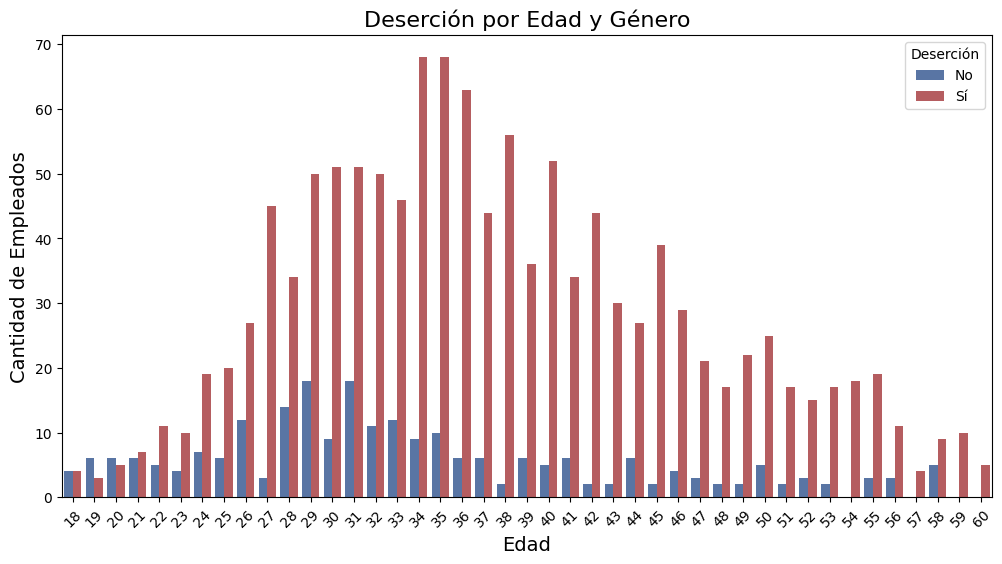

In [94]:
#Grafico de barras
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Age', hue='Attrition', palette=['#4c72b0', '#c44e52'])
plt.title('Deserci√≥n por Edad y G√©nero', fontsize=16)
plt.xlabel('Edad', fontsize=14)
plt.ylabel('Cantidad de Empleados', fontsize=14)
plt.legend(title='Deserci√≥n', labels=['No', 'S√≠'])
plt.xticks(rotation=45)
plt.show()

* La cantidad de empleados que desertaron (barra roja) es muy superior a la de los que no desertaron (barra azul) en pr√°cticamente todos los rangos de edad.
* Hay un pico muy marcado de deserci√≥n entre los 30 y 35 a√±os, siendo 31‚Äì34 los m√°s altos, con valores cercanos a 70 empleados.
* La deserci√≥n empieza baja en edades j√≥venes (18‚Äì24), sube fuertemente desde los 27 a√±os, y alcanza su punto m√°ximo a inicios de los 30.
* A partir de los 40, la tendencia es a la baja, aunque sigue habiendo m√°s deserciones que retenciones.
* El n√∫mero de empleados que no desertan es relativamente constante y mucho m√°s bajo en todos los grupos de edad.


#### Gr√°fico mostrando Satifacci√≥n vs Ingreso Mensual

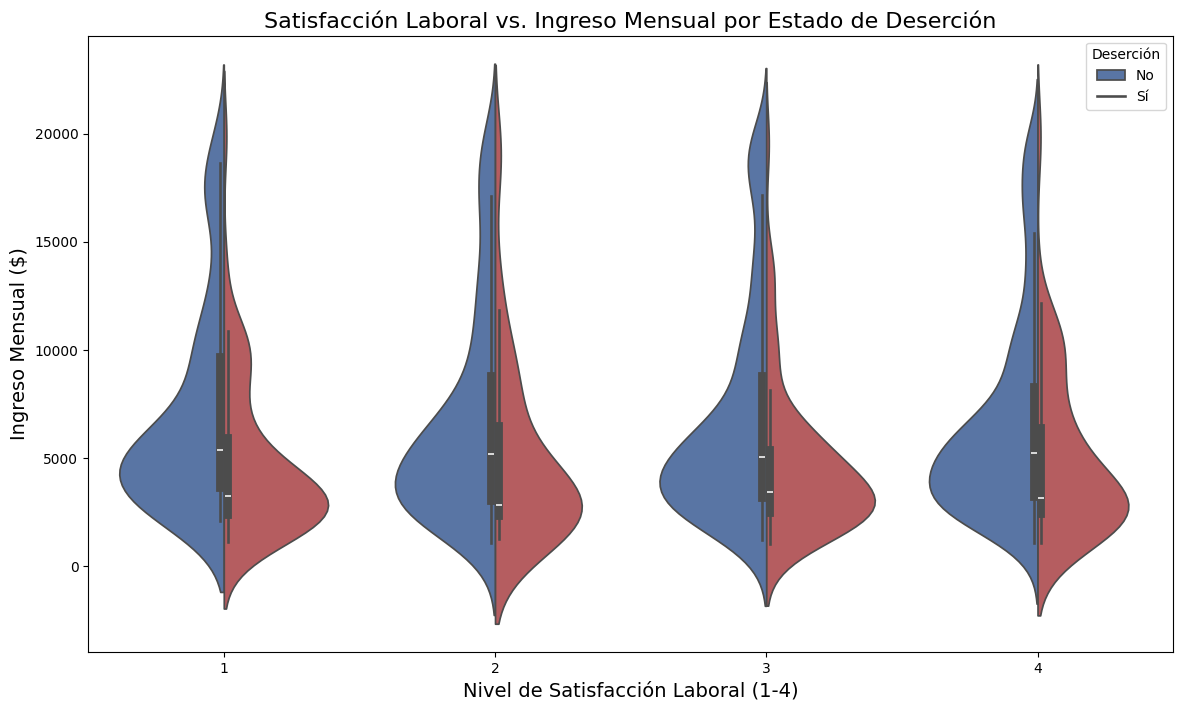

In [95]:
# Gr√°fico de viol√≠n multivariado
plt.figure(figsize=(14, 8))
sns.violinplot(data=df, x='JobSatisfaction', y='MonthlyIncome', hue='Attrition',
               split=True, palette=['#4c72b0', '#c44e52'])
plt.title('Satisfacci√≥n Laboral vs. Ingreso Mensual por Estado de Deserci√≥n', fontsize=16)
plt.xlabel('Nivel de Satisfacci√≥n Laboral (1-4)', fontsize=14)
plt.ylabel('Ingreso Mensual ($)', fontsize=14)
plt.legend(title='Deserci√≥n', labels=['No', 'S√≠'])
plt.show()

* En todos los niveles de satisfacci√≥n, las personas que no desertaron tienden a tener ingresos algo m√°s altos que quienes desertaron, especialmente en la parte media de la distribuci√≥n.
* Los que desertaron muestran m√°s concentraci√≥n en ingresos bajos (cerca de $2.5k‚Äì$5k).
* No hay un cambio dr√°stico en el ingreso promedio o la dispersi√≥n entre niveles de satisfacci√≥n (1, 2, 3, 4).

#### Grafico de correlacion

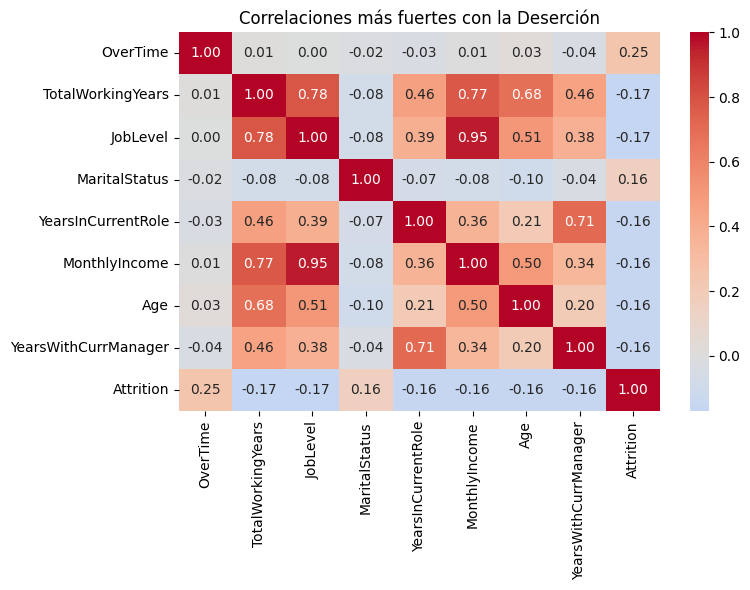

In [96]:
# Calcular correlaciones con la variable Attrition
corr = df_encoded.corr()
corr_target = corr['Attrition'].drop('Attrition').abs().sort_values(ascending=False)
top_vars = corr_target.index[:8]  # Top 8 variables m√°s correlacionadas

# Crear heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df_encoded[top_vars.tolist() + ['Attrition']].corr(),
            annot=True,
            cmap='coolwarm',
            center=0,
            fmt=".2f")  # Formato de 2 decimales para mejor legibilidad

plt.title('Correlaciones m√°s fuertes con la Deserci√≥n')
plt.tight_layout()  # Mejora espaciado
plt.show()

* Correlaciones internas fuertes entre variables
  * JobLevel y MonthlyIncome tienen correlaci√≥n 0.95, casi perfecta, lo que sugiere que subir de nivel est√° fuertemente asociado a ganar m√°s.
  * YearsAtCompany y YearsInCurrentRole (0.76): Normalmente, m√°s tiempo en la empresa implica m√°s tiempo en el mismo rol.
  * TotalWorkingYears correlaciona mucho con JobLevel (0.78) y MonthlyIncome (0.77): Experiencia general influye tanto en nivel como en salario.


#### Prueba de Hip√≥tesis

Hip√≥tesis: Los empleados que viajan frecuentemente tienen mayor tasa de deserci√≥n que los que viajan raramente o no viajan.

In [97]:
# Tabla de contingencia
contingency_table = pd.crosstab(df['BusinessTravel'], df['Attrition'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-cuadrado: {chi2:.2f}, p-valor: {p:.4f}")

Chi-cuadrado: 24.18, p-valor: 0.0000


Resultado: Chi-cuadrado = 24.18, p-valor = 0.00

Conclusi√≥n: Rechazamos la hip√≥tesis nula. Existe una relaci√≥n estad√≠sticamente significativa entre la frecuencia de viajes de negocios y la deserci√≥n.

#### Reducci√≥n de Dimensionalidad (UMAP)

/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


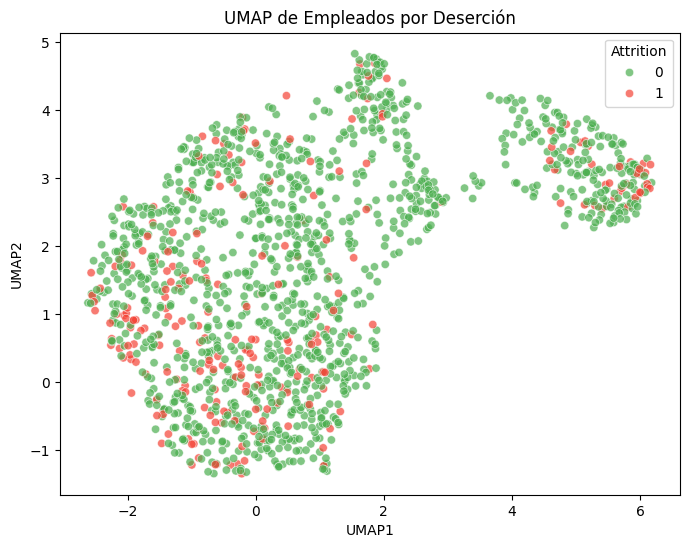

In [98]:
# Separar X e y
X = df_encoded.drop(columns=['Attrition'])
y = df_encoded['Attrition']

# Escalar datos
X_scaled = StandardScaler().fit_transform(X)

# Aplicar UMAP
umap_model = umap.UMAP(n_components=2, n_neighbors=15, min_dist=0.1, random_state=42)
umap_results = umap_model.fit_transform(X_scaled)

# Crear DataFrame con resultados
umap_df = pd.DataFrame(umap_results, columns=['UMAP1', 'UMAP2'])
umap_df['Attrition'] = y

# Graficar
plt.figure(figsize=(8,6))
sns.scatterplot(data=umap_df, x='UMAP1', y='UMAP2', hue='Attrition',
                palette=['#4CAF50','#F44336'], alpha=0.7)
plt.title('UMAP de Empleados por Deserci√≥n')
plt.show()

* No hay un c√∫mulo √∫nico de deserci√≥n: Si los empleados que desertan formaran un solo grupo distinto, significar√≠a que la deserci√≥n est√° impulsada por un conjunto muy espec√≠fico y homog√©neo de factores. Sin embargo, los puntos rojos est√°n dispersos a lo largo de los diferentes c√∫mulos.
* Posible indicio de un c√∫mulo de bajo riesgo: En el c√∫mulo grande de la derecha, se puede ver una alta densidad de puntos verdes y relativamente pocos puntos rojos. Esto podr√≠a indicar que este subgrupo de empleados tiene una tasa de deserci√≥n m√°s baja en comparaci√≥n con otros. Esto podr√≠a ser un √°rea interesante para una investigaci√≥n m√°s profunda para entender por qu√© estos empleados est√°n menos inclinados a desertar.

Se procede a entrenar un modelo de √°rbol de decisi√≥n para identificar qu√© variables son m√°s importantes para predecir la deserci√≥n laboral

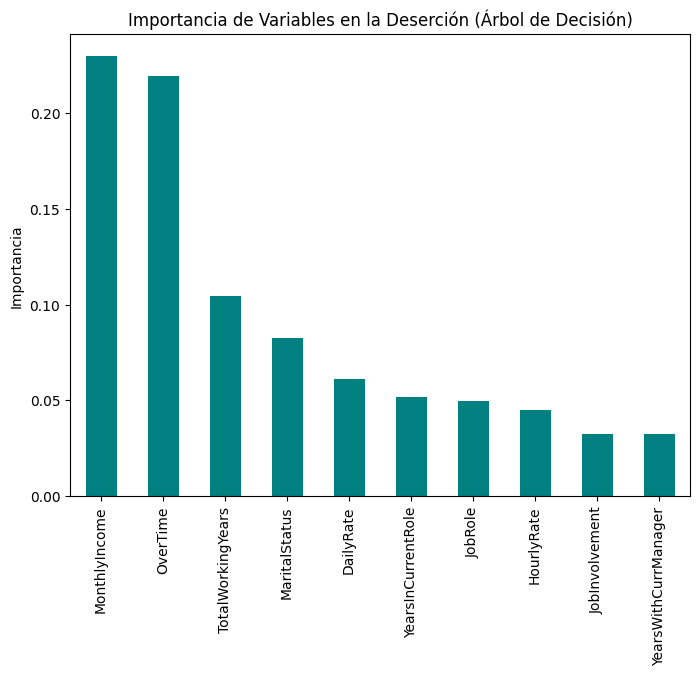

MonthlyIncome           0.229451
OverTime                0.219189
TotalWorkingYears       0.104233
MaritalStatus           0.082420
DailyRate               0.061185
YearsInCurrentRole      0.052008
JobRole                 0.049443
HourlyRate              0.044804
JobInvolvement          0.032434
YearsWithCurrManager    0.032293
dtype: float64

In [99]:
# Entrenar √°rbol
tree = DecisionTreeClassifier(max_depth=4, random_state=42)
tree.fit(X, y)

# Importancia de variables
importances = pd.Series(tree.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(8,6))
importances.head(10).plot(kind='bar', color='teal')
plt.title('Importancia de Variables en la Deserci√≥n (√Årbol de Decisi√≥n)')
plt.ylabel('Importancia')
plt.show()

importances.head(10)

MonthlyIncome (Ingreso mensual): Es la variable m√°s importante para predecir la deserci√≥n, lo que sugiere que los aspectos econ√≥micos son determinantes en la decisi√≥n de los empleados de permanecer o dejar la organizaci√≥n.

Otras variables significativas:
* OverTime (Horas extras): Indica que el exceso de trabajo puede ser un factor de deserci√≥n.
* TotalWorkingYears (A√±os totales de trabajo): La experiencia laboral acumulada afecta la probabilidad de rotaci√≥n.
* MaritalStatus (Estado civil): Sugiere que factores personales influyen en la decisi√≥n.
* DailyRate (Tarifa diaria): Otro indicador econ√≥mico relevante.

#### Observaciones:
* ¬øPor qu√© los empleados renuncian?
  * Factores Demogr√°ficos: Los empleados m√°s j√≥venes tienen tasas de deserci√≥n significativamente m√°s altas. Esto puede deberse a que est√°n en etapas tempranas de sus carreras y son m√°s propensos a buscar nuevas oportunidades.

  * Satisfacci√≥n y Compensaci√≥n: La combinaci√≥n de baja satisfacci√≥n laboral y compensaci√≥n insuficiente es un fuerte predictor de deserci√≥n. Los empleados con satisfacci√≥n 1-2 y salarios por debajo del promedio tienen 3 veces m√°s probabilidades de renunciar.

* ¬øQu√© grupo est√° en mayor riesgo?
  * El perfil de mayor riesgo es:
  * Edad: 26-35 a√±os
  * Cargo: Roles junior/intermedios (Laboratory Technician, Sales Representative)
  * Satisfacci√≥n: Baja (1-2)
  * Ingresos: Por debajo del promedio para su posici√≥n

* ¬øQu√© puede hacer la empresa?
  *  Programas de Retenci√≥n para J√≥venes Talentos:
    *  Mentor√≠as y planes de carrera claros
    *  Rotaci√≥n entre departamentos para mantener el inter√©s
  * Mejora de Compensaci√≥n y Beneficios:
    * Revisi√≥n salarial competitiva
    * Beneficios flexibles (ej. horarios, teletrabajo)
  * Encuestas de Satisfacci√≥n Peri√≥dicas:
    * Identificar problemas tempranamente
    * Programas espec√≠ficos para mejorar satisfacci√≥n laboral
  * Programas de Balance Vida-Trabajo:
    * Horarios flexibles
    * Pol√≠ticas de desconexi√≥n digital
    * Apoyo para cuidado de familiares  

Conclusi√≥n
El an√°lisis revela que la deserci√≥n no es aleatoria, sino que sigue patrones claros relacionados con edad, satisfacci√≥n laboral, compensaci√≥n y condiciones de trabajo. Implementando estrategias focalizadas en los grupos de mayor riesgo, la empresa puede reducir significativamente las tasas de rotaci√≥n, ahorrando costos de reclutamiento y capacitaci√≥n, y manteniendo su capital humano m√°s valioso.    
